<a href="https://colab.research.google.com/github/bgohrani/Convolutional_Neural_Networks/blob/main/CG_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cifar10

In [15]:
import cifar10
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import svm
import torch
import torchvision
from torchvision.transforms import transforms

In [16]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True,transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset,batch_size=50000,shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True,transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset,batch_size=10000,shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [28]:
dataiter = iter(trainloader)
images_train_tensor,labels_train_tensor = dataiter.next()

In [29]:
dataiter = iter(testloader)
images_test_tensor, labels_test_tensor = dataiter.next()

In [53]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship',	'truck']						

In [30]:
print(images_train_tensor.shape)
print(images_test_tensor.shape)
print(labels_train_tensor.shape)
print(labels_test_tensor.shape)

torch.Size([50000, 3, 32, 32])
torch.Size([10000, 3, 32, 32])
torch.Size([50000])
torch.Size([10000])


In [27]:
cls_train = [0,1,2,3,4,5,6,7,8,9]
cls_test = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
set(cls_test)

In [31]:
images_train = images_train_tensor.cpu().detach().numpy()
images_test = images_test_tensor.cpu().detach().numpy()


In [44]:
labels_train = labels_train_tensor.cpu().detach().numpy()
labels_test = labels_test_tensor.cpu().detach().numpy()

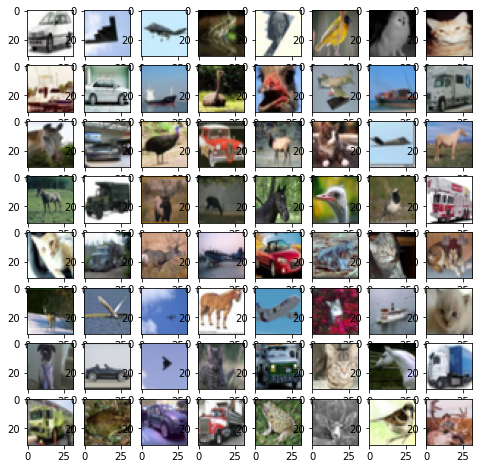

In [36]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(images_train[i].transpose(1,2,0))
plt.show()

In [45]:
import numpy as np

x_train = images_train

y_train= labels_train

x_train_flat = x_train.reshape(50000, 3072)

x_train_flat.shape

(50000, 3072)

In [46]:
x_test = images_test

y_test= labels_test

x_test_flat = x_test.reshape(10000, 3072)

x_test_flat.shape

(10000, 3072)

In [47]:
from sklearn.decomposition import PCA

pca= PCA()
pca.fit(x_train_flat)

PCA()

In [48]:
k=0
total= sum(pca.explained_variance_)
current_sum=0
while current_sum/total < 0.95:
    current_sum += pca.explained_variance_[k]
    k+=1
k

217

In [49]:
pca=PCA(n_components=k,whiten=True)
train_transform_data= pca.fit_transform(x_train_flat)
train_transform_data.shape

(50000, 217)

In [50]:
test_transform_data=pca.transform(x_test_flat)
test_transform_data.shape

(10000, 217)

In [51]:
clf_svm=  svm.SVC()
clf_svm.fit(train_transform_data,y_train)

SVC()

In [52]:
y_pred= clf_svm.predict(test_transform_data)

In [54]:
a = []
for i in y_pred:
    a.append(class_names[i])

In [55]:
import pandas as pd
df = pd.DataFrame(a)
print(df)
df.to_csv("CIFAR_10_Project_submission2.csv", index = False, header = False)

             0
0          cat
1         ship
2         ship
3     airplane
4         frog
...        ...
9995       cat
9996      frog
9997       dog
9998       dog
9999     horse

[10000 rows x 1 columns]
